# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [1]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers

2023-11-20 16:14:47.876075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 16:14:48.143094: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 16:14:48.155579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-20 16:14:48.155609: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [3]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [5]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [6]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30)

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [8]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f8582345480>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [9]:
preproc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f8582345480>))])

In [10]:
X_train = preproc.transform(X_train)
X_val = preproc.transform(X_val)

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [11]:
X_train.shape

(1022, 157)

In [25]:
def initialize_model():
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    model.add(layers.Dense(5, activation="relu", input_dim = 157))
    model.add(layers.Dense(4, activation="relu"))
    model.add(layers.Dense(3, activation="relu"))
    model.add(layers.Dense(1, activation="linear"))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='msle', 
                  optimizer='adam',
                 metrics="msle") 

    return model 

❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [26]:
model = initialize_model()
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 16ms/step - loss: 138.0361 - msle: 138.0361 - val_loss: 125.1318 - val_msle: 125.1318
Epoch 2/500
32/32 [==============================] - 0s 10ms/step - loss: 115.5289 - msle: 115.5289 - val_loss: 108.0186 - val_msle: 108.0186
Epoch 3/500
32/32 [==============================] - 0s 10ms/step - loss: 103.6898 - msle: 103.6898 - val_loss: 99.3110 - val_msle: 99.3110
Epoch 4/500
32/32 [==============================] - 0s 11ms/step - loss: 95.7603 - msle: 95.7603 - val_loss: 91.9528 - val_msle: 91.9528
Epoch 5/500
32/32 [==============================] - 0s 11ms/step - loss: 89.1983 - msle: 89.1983 - val_loss: 86.2564 - val_msle: 86.2564
Epoch 6/500
32/32 [==============================] - 0s 11ms/step - loss: 84.0946 - msle: 84.0946 - val_loss: 81.6771 - val_msle: 81.6771
Epoch 7/500
32/32 [==============================] - 0s 11ms/step - loss: 79.8740 - msle: 79.8740 - val_loss: 77.7947 - val_msle: 77.7947
Epoch 8/500
32/32 [=====

Epoch 60/500
32/32 [==============================] - 0s 11ms/step - loss: 21.4307 - msle: 21.4307 - val_loss: 21.1563 - val_msle: 21.1563
Epoch 61/500
32/32 [==============================] - 0s 10ms/step - loss: 21.0530 - msle: 21.0530 - val_loss: 20.7835 - val_msle: 20.7835
Epoch 62/500
32/32 [==============================] - 0s 12ms/step - loss: 20.6838 - msle: 20.6838 - val_loss: 20.4191 - val_msle: 20.4191
Epoch 63/500
32/32 [==============================] - 0s 10ms/step - loss: 20.3228 - msle: 20.3228 - val_loss: 20.0627 - val_msle: 20.0627
Epoch 64/500
32/32 [==============================] - 0s 12ms/step - loss: 19.9696 - msle: 19.9696 - val_loss: 19.7145 - val_msle: 19.7145
Epoch 65/500
32/32 [==============================] - 0s 11ms/step - loss: 19.6245 - msle: 19.6245 - val_loss: 19.3731 - val_msle: 19.3731
Epoch 66/500
32/32 [==============================] - 0s 14ms/step - loss: 19.2864 - msle: 19.2864 - val_loss: 19.0392 - val_msle: 19.0392
Epoch 67/500
32/32 [=======

32/32 [==============================] - 0s 11ms/step - loss: 8.0353 - msle: 8.0353 - val_loss: 7.9131 - val_msle: 7.9131
Epoch 120/500
32/32 [==============================] - 0s 12ms/step - loss: 7.9037 - msle: 7.9037 - val_loss: 7.7825 - val_msle: 7.7825
Epoch 121/500
32/32 [==============================] - 0s 13ms/step - loss: 7.7739 - msle: 7.7739 - val_loss: 7.6540 - val_msle: 7.6540
Epoch 122/500
32/32 [==============================] - 0s 11ms/step - loss: 7.6461 - msle: 7.6461 - val_loss: 7.5273 - val_msle: 7.5273
Epoch 123/500
32/32 [==============================] - 0s 12ms/step - loss: 7.5200 - msle: 7.5200 - val_loss: 7.4029 - val_msle: 7.4029
Epoch 124/500
32/32 [==============================] - 0s 12ms/step - loss: 7.3960 - msle: 7.3960 - val_loss: 7.2801 - val_msle: 7.2801
Epoch 125/500
32/32 [==============================] - 0s 13ms/step - loss: 7.2738 - msle: 7.2738 - val_loss: 7.1590 - val_msle: 7.1590
Epoch 126/500
32/32 [==============================] - 0s 12ms

32/32 [==============================] - 0s 11ms/step - loss: 2.7534 - msle: 2.7534 - val_loss: 2.6873 - val_msle: 2.6873
Epoch 180/500
32/32 [==============================] - 0s 10ms/step - loss: 2.6993 - msle: 2.6993 - val_loss: 2.6341 - val_msle: 2.6341
Epoch 181/500
32/32 [==============================] - 0s 11ms/step - loss: 2.6462 - msle: 2.6462 - val_loss: 2.5813 - val_msle: 2.5813
Epoch 182/500
32/32 [==============================] - 0s 9ms/step - loss: 2.5937 - msle: 2.5937 - val_loss: 2.5297 - val_msle: 2.5297
Epoch 183/500
32/32 [==============================] - 0s 10ms/step - loss: 2.5422 - msle: 2.5422 - val_loss: 2.4787 - val_msle: 2.4787
Epoch 184/500
32/32 [==============================] - 0s 9ms/step - loss: 2.4913 - msle: 2.4913 - val_loss: 2.4287 - val_msle: 2.4287
Epoch 185/500
32/32 [==============================] - 0s 10ms/step - loss: 2.4414 - msle: 2.4414 - val_loss: 2.3792 - val_msle: 2.3792
Epoch 186/500
32/32 [==============================] - 0s 9ms/st

32/32 [==============================] - 0s 12ms/step - loss: 0.6484 - msle: 0.6484 - val_loss: 0.6126 - val_msle: 0.6126
Epoch 240/500
32/32 [==============================] - 0s 11ms/step - loss: 0.6290 - msle: 0.6290 - val_loss: 0.5935 - val_msle: 0.5935
Epoch 241/500
32/32 [==============================] - 0s 12ms/step - loss: 0.6099 - msle: 0.6099 - val_loss: 0.5750 - val_msle: 0.5750
Epoch 242/500
32/32 [==============================] - 0s 11ms/step - loss: 0.5914 - msle: 0.5914 - val_loss: 0.5569 - val_msle: 0.5569
Epoch 243/500
32/32 [==============================] - 0s 11ms/step - loss: 0.5733 - msle: 0.5733 - val_loss: 0.5392 - val_msle: 0.5392
Epoch 244/500
32/32 [==============================] - 0s 10ms/step - loss: 0.5557 - msle: 0.5557 - val_loss: 0.5219 - val_msle: 0.5219
Epoch 245/500
32/32 [==============================] - 0s 11ms/step - loss: 0.5384 - msle: 0.5384 - val_loss: 0.5051 - val_msle: 0.5051
Epoch 246/500
32/32 [==============================] - 0s 11ms

32/32 [==============================] - 0s 12ms/step - loss: 0.1217 - msle: 0.1217 - val_loss: 0.1034 - val_msle: 0.1034
Epoch 300/500
32/32 [==============================] - 0s 12ms/step - loss: 0.1199 - msle: 0.1199 - val_loss: 0.1019 - val_msle: 0.1019
Epoch 301/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1183 - msle: 0.1183 - val_loss: 0.1004 - val_msle: 0.1004
Epoch 302/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1168 - msle: 0.1168 - val_loss: 0.0989 - val_msle: 0.0989
Epoch 303/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1153 - msle: 0.1153 - val_loss: 0.0976 - val_msle: 0.0976
Epoch 304/500
32/32 [==============================] - 0s 11ms/step - loss: 0.1139 - msle: 0.1139 - val_loss: 0.0963 - val_msle: 0.0963
Epoch 305/500
32/32 [==============================] - 0s 12ms/step - loss: 0.1127 - msle: 0.1127 - val_loss: 0.0952 - val_msle: 0.0952
Epoch 306/500
32/32 [==============================] - 0s 11ms

32/32 [==============================] - 0s 8ms/step - loss: 0.0880 - msle: 0.0880 - val_loss: 0.0735 - val_msle: 0.0735
Epoch 360/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0877 - msle: 0.0877 - val_loss: 0.0732 - val_msle: 0.0732
Epoch 361/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0875 - msle: 0.0875 - val_loss: 0.0730 - val_msle: 0.0730
Epoch 362/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0872 - msle: 0.0872 - val_loss: 0.0727 - val_msle: 0.0727
Epoch 363/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0869 - msle: 0.0869 - val_loss: 0.0724 - val_msle: 0.0724
Epoch 364/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0866 - msle: 0.0866 - val_loss: 0.0722 - val_msle: 0.0722
Epoch 365/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0863 - msle: 0.0863 - val_loss: 0.0719 - val_msle: 0.0719
Epoch 366/500
32/32 [==============================] - 0s 8ms/step - 

Epoch 420/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0666 - msle: 0.0666 - val_loss: 0.0545 - val_msle: 0.0545
Epoch 421/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0662 - msle: 0.0662 - val_loss: 0.0542 - val_msle: 0.0542
Epoch 422/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0658 - msle: 0.0658 - val_loss: 0.0539 - val_msle: 0.0539
Epoch 423/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0654 - msle: 0.0654 - val_loss: 0.0535 - val_msle: 0.0535
Epoch 424/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0650 - msle: 0.0650 - val_loss: 0.0532 - val_msle: 0.0532
Epoch 425/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0646 - msle: 0.0646 - val_loss: 0.0528 - val_msle: 0.0528
Epoch 426/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0642 - msle: 0.0642 - val_loss: 0.0525 - val_msle: 0.0525
Epoch 427/500
32/32 [==============================] - 

Epoch 481/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0444 - msle: 0.0444 - val_loss: 0.0367 - val_msle: 0.0367
Epoch 482/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0441 - msle: 0.0441 - val_loss: 0.0365 - val_msle: 0.0365
Epoch 483/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0438 - msle: 0.0438 - val_loss: 0.0364 - val_msle: 0.0364
Epoch 484/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0436 - msle: 0.0436 - val_loss: 0.0362 - val_msle: 0.0362
Epoch 485/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0433 - msle: 0.0433 - val_loss: 0.0360 - val_msle: 0.0360
Epoch 486/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0430 - msle: 0.0430 - val_loss: 0.0358 - val_msle: 0.0358
Epoch 487/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0428 - msle: 0.0428 - val_loss: 0.0356 - val_msle: 0.0356
Epoch 488/500
32/32 [==============================] - 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 790       
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


🎁 We coded a `plot_history` function that you can use to detect overfitting

In [16]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

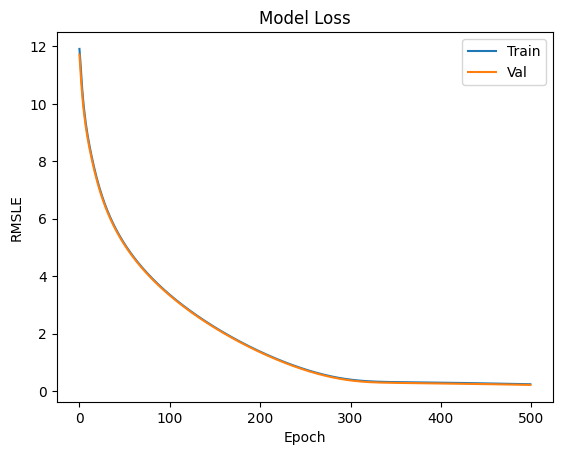

In [17]:
plot_history(history)

In [19]:
X_test_transformed = preproc.transform(X_test)
y_pred = model.predict(X_test_transformed)

46/46 [==============================] - 0s 4ms/step


In [20]:
results_df = pd.DataFrame()
results_df["Id"] = X_test["Id"]
results_df["SalePrice"] = y_pred
results_df.set_index("Id", inplace=True)
results_df.to_csv("data/submission_final.csv")

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [21]:
def evaluate_model(X, y, train_index, val_index):
    
    # Slicing the training set and the validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y,  test_size = 0.30)
    
    # Preprocessing 
    X_train = preproc.transform(X_train)
    X_val = preproc.transform(X_val)
    
    # Training the model on the preprocessed training dataset
    model.fit(X_train, y_train, epochs=500)
    
    # Evaluating the model on the preprocessed validation dataset
    model.evaluate(X_val, y_val)
    
    return pd.DataFrame({
                'rmsle_final_epoch': ["rmsle"],
                'rmsle_min': ["min_rmsle"]
                        })

### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [22]:
!pip install --quiet dask

In [23]:
from sklearn.model_selection import KFold
from dask import delayed

# cv = 5
# kf = KFold(n_splits = cv, shuffle = True)
# f = delayed(evaluate_model)

# results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
#                   ]).compute(
#                       scheduler='processes', num_workers=8)

# pd.concat(results, axis=0).reset_index(drop=True)

### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation - BROKEN LINK](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

In [24]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)
    
for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback = log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

NameError: name 'kf' is not defined

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [ ]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [ ]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [ ]:
# results.to_csv("submission_final.csv", header = True, index = False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!